# Klustering penjualan supermarket

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

Data set ini berisi data penjualan pada supermarket. Data set ini berisi beberapa atribut yang memuat informasi sebagai berikut.

1. Invoice id: id struk pembayaran
2. Branch: cabang supermarket, dalam hal ini terdapat 3 cabang A, B, C
3. City: Location of supercenters
4. Customer type: Jenis konsumen, konsumen yang terdaftar sebagai member atau tidak
5. Gender: Jenis kelamin konsumen
6. Product line: Kategori produk yang dijual - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
7. Unit price: Harga produk dalam $
8. Quantity: Jumlah barang yang dijual
9. Tax: pajak sebesar 5% dari pembelian
10. Total: Total harga sudah termasuk pajak
11. Date: Tanggal transaksi
12. Time: Waktu transaksi (10am to 9pm)
13. Payment: Metode pembayaran yang dapat dilakukan oleh konsumen – Cash, Credit card dan Ewallet
14. COGS: Cost of goods sold
15. Gross margin percentage: Gross margin percentage
16. Gross income: Pendapatan kotor
17. Rating: Penilaian konsumen terhadap pengalaman berbelanja pada skala 1-10

In [2]:
df = pd.read_csv("supermarket_sales.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df["Date"] = pd.to_datetime(df["Date"])

Pada dataset tersebut, bahwa supermartket memiliki 3 cabang, cabang A berada di kota Yangon, cabang C berada di kota Naypitaw dan cabang B berada di kota Mandalay. Supermarket juga mengkelompokkan konsumennya mmenjadi dua yaitu member dan normal, konsumen dapat melakukan transaksi melalui Ewallet, Cash maupun Credit card. Supermarkat sendiri menjual enam jenis barang yaitu Health and beauty, Electronic accessories, Home and lifestyle,
 Sports and travel, Food and beverages dan Fashion accessories.

In [4]:
print("Daftar Branch : ",df["Branch"].unique(),"\n")
print("Daftar Kota : ",df["City"].unique(),"\n")
print("Jenis Pelanggan : ",df["Customer type"].unique(),"\n")
print("Jenis Produk : ",df["Product line"].unique(),"\n")
print("Jenis Pembayaran : ",df["Payment"].unique(),"\n")

Daftar Branch :  ['A' 'C' 'B'] 

Daftar Kota :  ['Yangon' 'Naypyitaw' 'Mandalay'] 

Jenis Pelanggan :  ['Member' 'Normal'] 

Jenis Produk :  ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories'] 

Jenis Pembayaran :  ['Ewallet' 'Cash' 'Credit card'] 



Mencari kluster dari data penjualan, disini akan kita cari seperti apa perilaku konsumen dengan memilih dua variabel yaitu gross income dan Rating

[Text(0.5, 1.0, 'Scatter plot Rating and Gross Income')]

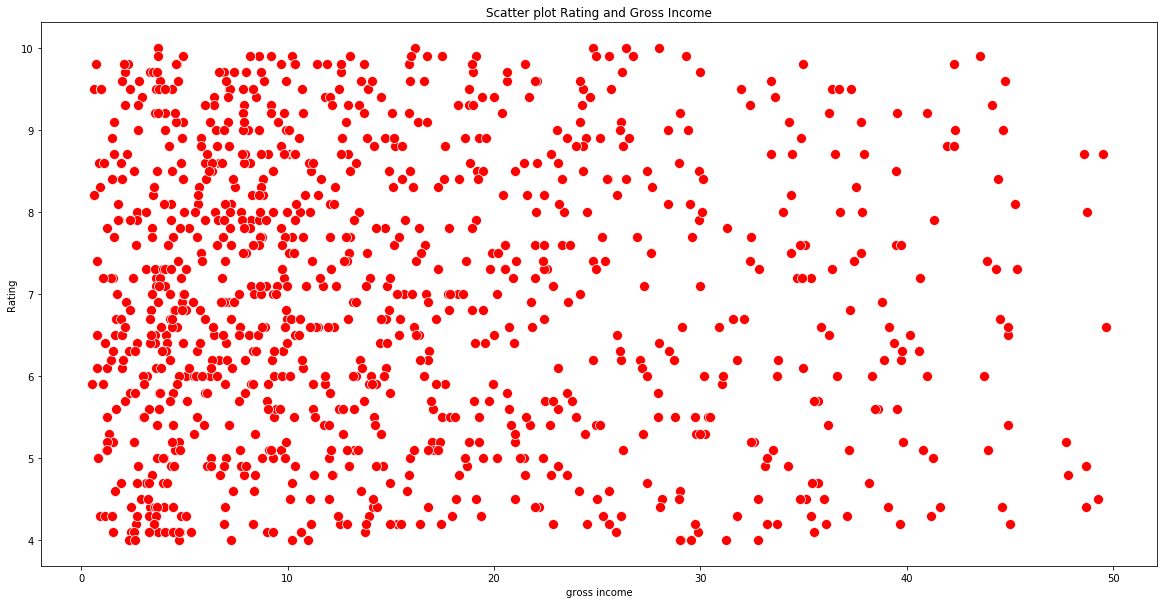

In [5]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="gross income", 
                y="Rating", 
                data=df, s=100, color="red").set(title='Scatter plot Rating and Gross Income')

In [6]:
dfc = df[["gross income","Rating"]]
dfc.head()

,gross income,Rating
0,26.1415,9.1
1,3.8200,9.6
2,16.2155,7.4
3,23.2880,8.4
4,30.2085,5.3


Mencari Inertias, inertias diperlukan untuk mencari kluster yang tepat.

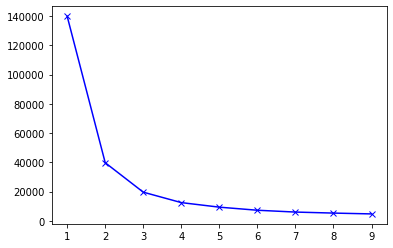

In [7]:
X = np.array(list(zip(dfc["gross income"].values.astype(int),dfc["Rating"].values.astype(int)))).reshape(len(dfc["gross income"]),2)

inertias=[]
K= range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    inertias.append(kmeanModel.inertia_)
plt.plot(K,inertias, 'bx-')
plt.show()

Dari grafik di atas patahan terjadi pada titik 3, sehingga pembagian kluster yang tepat adalah 3 kluster.

In [8]:
x_array = np.array(dfc)
x_array

array([[26.1415,  9.1   ],
       [ 3.82  ,  9.6   ],
       [16.2155,  7.4   ],
       ...,
       [ 1.592 ,  7.7   ],
       [ 3.291 ,  4.1   ],
       [30.919 ,  6.6   ]])

In [9]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.52161615, 0.85      ],
       [0.06738704, 0.93333333],
       [0.31962801, 0.56666667],
       ...,
       [0.02204857, 0.61666667],
       [0.0566222 , 0.01666667],
       [0.6188354 , 0.43333333]])

In [10]:
kmeans = KMeans(n_clusters = 3, random_state=123)
kmeans.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [11]:
print(kmeans.cluster_centers_)

[[0.67138402 0.38218391]
 [0.23963639 0.77755102]
 [0.17872797 0.27917695]]


## Hasil cluster

In [12]:
df["kluster"] = kmeans.labels_
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,kluster
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,1
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,1
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,0


In [13]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'kluster'],
      dtype='object')

Scatterplot hasil klustering

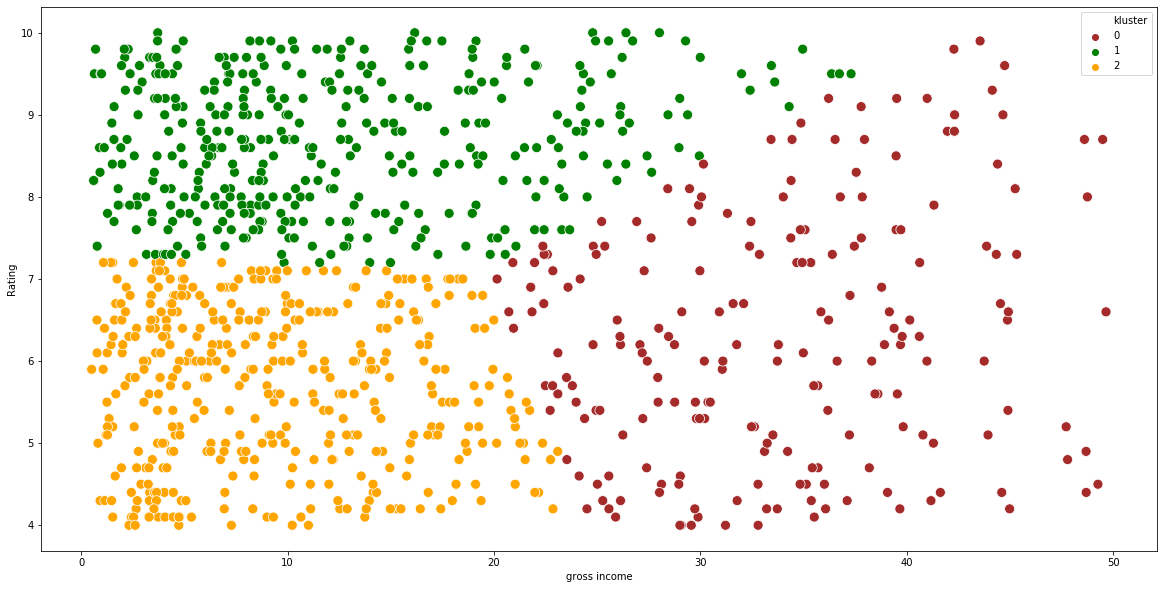

In [14]:
color_dict = dict({0:'brown',
                  1:'green',
                  2:'orange'})
plt.figure(figsize=(20,10))
sns.scatterplot(x="gross income", y="Rating", data=df, s=100, hue="kluster", palette=color_dict)

In [15]:
dk0 = df[df["kluster"]==0].describe()["gross income"]
dk1 = df[df["kluster"]==1].describe()["gross income"]
dk2 = df[df["kluster"]==2].describe()["gross income"]
cc = pd.DataFrame({'kluster 0 gross income':dk0.values,
                   'kluster 1 gross income':dk1.values,
                   'kluster 2 gross income':dk2.values}, index=dk0.index)
cc

,kluster 0 gross income,kluster 1 gross income,kluster 2 gross income
count,203.000000,392.000000,405.000000
mean,33.501318,12.284592,9.291460
std,7.407348,8.217227,5.895869
min,20.150000,0.604500,0.508500
25%,27.519500,5.985875,4.125000
50%,33.421500,10.162500,8.377000
75%,39.110000,18.277250,13.962000
max,49.650000,37.300000,23.090000


In [16]:
desck0 = df[df["kluster"]==0].describe()["Rating"]
desck1 = df[df["kluster"]==1].describe()["Rating"]
desck2 = df[df["kluster"]==2].describe()["Rating"]

descdf = pd.DataFrame({"Rating Kluster 0 ":desck0.values,
                       "Rating Kluster 1 ":desck1.values,
                       "Rating Kluster 2 ":desck2.values}, index=desck0.index)
descdf

,Rating Kluster 0,Rating Kluster 1,Rating Kluster 2
count,203.000000,392.000000,405.000000
mean,6.293103,8.665306,5.675062
std,1.493733,0.793658,0.937130
min,4.000000,7.200000,4.000000
25%,5.100000,8.000000,4.900000
50%,6.200000,8.700000,5.800000
75%,7.400000,9.400000,6.500000
max,9.900000,10.000000,7.200000


Dari tiga kluster yang ada kita beri nama kluster 0, 1 dan 2. Kemudian kita akan lihat jumlah pendapatan kotor pada setiap kluster sesuai dengan jenis produk

In [17]:
print("Kluster 0")
print(df[df["kluster"]==0].groupby(["Product line"])["Quantity", "gross income", "Rating"].sum(),"\n")
print("Kluster 1")
print(df[df["kluster"]==1].groupby(["Product line"])["Quantity", "gross income", "Rating"].sum(),"\n")
print("Kluster 2")
print(df[df["kluster"]==2].groupby(["Product line"])["Quantity", "gross income", "Rating"].sum(),"\n")

Kluster 0
                        Quantity  gross income  Rating
Product line                                          
Electronic accessories       283     1115.3560   198.0
Fashion accessories          269     1079.2110   207.1
Food and beverages           270     1095.2255   201.0
Health and beauty            251     1001.5165   201.0
Home and lifestyle           319     1290.6620   237.2
Sports and travel            300     1218.7965   233.2 

Kluster 1
                        Quantity  gross income  Rating
Product line                                          
Electronic accessories       347      765.0105   557.8
Fashion accessories          335      860.7085   603.7
Food and beverages           369      898.9445   666.5
Health and beauty            333      837.4175   553.2
Home and lifestyle           327      724.3400   514.9
Sports and travel            299      729.1390   500.7 

Kluster 2
                        Quantity  gross income  Rating
Product line                   

In [18]:
df.describe().style.format("{:.3f}")

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,kluster
count,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000
mean,55.672,5.510,15.379,322.967,307.587,4.762,15.379,6.973,1.202
std,26.495,2.923,11.709,245.885,234.177,0.000,11.709,1.719,0.754
min,10.080,1.000,0.508,10.678,10.170,4.762,0.508,4.000,0.000
25%,32.875,3.000,5.925,124.422,118.497,4.762,5.925,5.500,1.000
50%,55.230,5.000,12.088,253.848,241.760,4.762,12.088,7.000,1.000
75%,77.935,8.000,22.445,471.350,448.905,4.762,22.445,8.500,2.000
max,99.960,10.000,49.650,1042.650,993.000,4.762,49.650,10.000,2.000


Melihat kluster 0

Gender
Female    109
Male       94
Name: kluster, dtype: int64


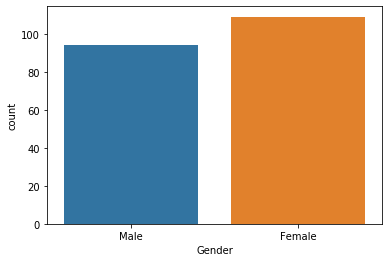

In [19]:
print(df[df["kluster"]==0].groupby(["Gender"]).kluster.count())
ax = sns.countplot(x="Gender", data=df[df["kluster"]==0])

In [20]:
print("Kluster 0 dengan pengkelompokan Gender dan Payment")
print(df[(df["kluster"]==0)].groupby(["Gender","Payment"]).kluster.count())
print("\nKluster 0 dengan pengkelompokan Gender dan Product line")
print(df[(df["kluster"]==0)].groupby(["Gender","Product line"]).kluster.count())

Kluster 0 dengan pengkelompokan Gender dan Payment
Gender  Payment    
Female  Cash           36
        Credit card    40
        Ewallet        33
Male    Cash           35
        Credit card    28
        Ewallet        31
Name: kluster, dtype: int64

Kluster 0 dengan pengkelompokan Gender dan Product line
Gender  Product line          
Female  Electronic accessories    16
        Fashion accessories       15
        Food and beverages        21
        Health and beauty         13
        Home and lifestyle        24
        Sports and travel         20
Male    Electronic accessories    17
        Fashion accessories       17
        Food and beverages        10
        Health and beauty         18
        Home and lifestyle        15
        Sports and travel         17
Name: kluster, dtype: int64


Gender
Female    202
Male      190
Name: kluster, dtype: int64


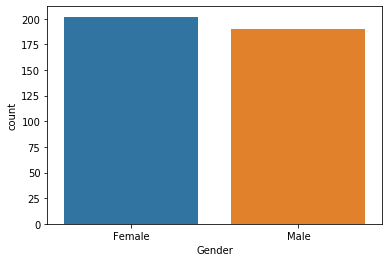

In [21]:
print(df[df["kluster"]==1].groupby(["Gender"]).kluster.count())
ax = sns.countplot(x="Gender", data=df[df["kluster"]==1])

In [22]:
print("Kluster 1 dengan pengkelompokan Gender dan Payment")
print(df[(df["kluster"]==1)].groupby(["Gender","Payment"]).kluster.count())
print("\nKluster 1 dengan pengkelompokan Gender dan Product line")
print(df[(df["kluster"]==1)].groupby(["Gender","Product line"]).kluster.count())

Kluster 1 dengan pengkelompokan Gender dan Payment
Gender  Payment    
Female  Cash           81
        Credit card    61
        Ewallet        60
Male    Cash           53
        Credit card    65
        Ewallet        72
Name: kluster, dtype: int64

Kluster 1 dengan pengkelompokan Gender dan Product line
Gender  Product line          
Female  Electronic accessories    31
        Fashion accessories       44
        Food and beverages        41
        Health and beauty         29
        Home and lifestyle        29
        Sports and travel         28
Male    Electronic accessories    33
        Fashion accessories       25
        Food and beverages        37
        Health and beauty         35
        Home and lifestyle        31
        Sports and travel         29
Name: kluster, dtype: int64


Gender
Female    190
Male      215
Name: kluster, dtype: int64


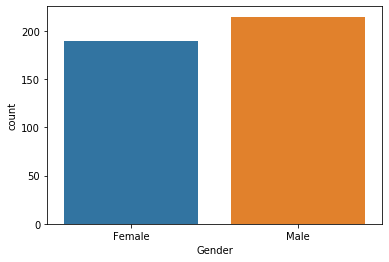

In [23]:
print(df[df["kluster"]==2].groupby(["Gender"]).kluster.count())
ax = sns.countplot(x="Gender", data=df[df["kluster"]==2])

In [24]:
print("Kluster 2 dengan pengkelompokan Gender dan Payment")
print(df[(df["kluster"]==2)].groupby(["Gender","Payment"]).kluster.count())
print("\nKluster 2 dengan pengkelompokan Gender dan Product line")
print(df[(df["kluster"]==2)].groupby(["Gender","Product line"]).kluster.count())

Kluster 2 dengan pengkelompokan Gender dan Payment
Gender  Payment    
Female  Cash           61
        Credit card    62
        Ewallet        67
Male    Cash           78
        Credit card    55
        Ewallet        82
Name: kluster, dtype: int64

Kluster 2 dengan pengkelompokan Gender dan Product line
Gender  Product line          
Female  Electronic accessories    37
        Fashion accessories       37
        Food and beverages        28
        Health and beauty         22
        Home and lifestyle        26
        Sports and travel         40
Male    Electronic accessories    36
        Fashion accessories       40
        Food and beverages        37
        Health and beauty         35
        Home and lifestyle        35
        Sports and travel         32
Name: kluster, dtype: int64
